# Scenario

## A student starts studying and then randomly chooses:

##### Math

##### Science

### The graph remembers:

#### study session started

#### subject studied

#### total study time

#### history of actions

In [1]:
from typing_extensions import TypedDict
from typing import Optional, List

In [2]:
class StudyState(TypedDict):
    session_status : str  # e.g., "started", "in_progress", "completed"
    subject : Optional[str]  # e.g., "Math", "Science"
    total_study_time : int  # in minutes
    history : List[str]  # list of actions taken

In [3]:
def start_study(state: StudyState):
    print("Study session started.")
    return {
        "session_status": "Studying",
        "subject": None, 
        "total_study_time": state["total_study_time"],
        "history": state["history"] + ["Study session started"]
        }


def study_math(state: StudyState):
    print("Studying Math...")
    return {
        "session_status": state["session_status"],
        "subject": "Math", 
        "total_study_time": state["total_study_time"] + 60,
        "history": state["history"] + ["Studied Math for 60 minutes"]
        }

def study_science(state: StudyState):
    print("Studying Science...")
    return {
        "session_status": state["session_status"],
        "subject": "Science", 
        "total_study_time": state["total_study_time"] + 45,
        "history": state["history"] + ["Studied Science for 45 minutes"]
        }



In [4]:
import random
from typing import Literal


In [5]:
def choose_subject(state: StudyState)-> Literal["math","science"]:
    subjects = state["subject"]

    if random.random()< 0.5:
        return "math"
    else:
        return "science"

In [15]:
from langgraph.graph import StateGraph, START , END

graph = StateGraph(StudyState)

## adding nodes
graph.add_node("start_study", start_study)
graph.add_node("math", study_math)
graph.add_node("science", study_science)

In [16]:
graph.add_edge(START, "start_study")
graph.add_conditional_edges("start_study", choose_subject)
graph.add_edge("math", END)
graph.add_edge("science", END)

In [17]:
graph_builder = graph.compile()


In [23]:
from IPython.display import display, Image

In [24]:
result = graph_builder.invoke({
    "session_status": "Not Started",
    "subject": None,  
    "total_study_time": 0, 
    "history": [] 
})

print(result)

Study session started.
Studying Science...
{'session_status': 'Studying', 'subject': 'Science', 'total_study_time': 45, 'history': ['Study session started', 'Studied Science for 45 minutes']}


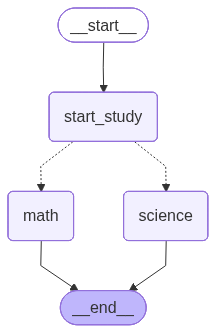

In [25]:
display(Image(graph_builder.get_graph().draw_mermaid_png()))